# Data Science Degree - Let's Code - Statistics Module 

## Project A - Analysis of the dataset "Wine Quality"

### Introduction

The Dataset is avaialable at:
    https://archive.ics.uci.edu/ml/datasets/Wine+Quality

Data Set Information:

The two datasets are related to red and white variants of the Portuguese "Vinho Verde" wine. For more details, consult: [Web Link] or the reference [Cortez et al., 2009]. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

These datasets can be viewed as classification or regression tasks. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Outlier detection algorithms could be used to detect the few excellent or poor wines. Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.


Attribute Information:

Input variables (based on physicochemical tests): <br>
- 1 - fixed acidity
- 2 - volatile acidity
- 3 - citric acid
- 4 - residual sugar
- 5 - chlorides
- 6 - free sulfur dioxide
- 7 - total sulfur dioxide
- 8 - density
- 9 - pH
- 10 - sulphates
- 11 - alcohol

Output variable (based on sensory data): <br>
- 12 - quality (score between 0 and 10)

### Step 1

**EDA - Exploratory Data Analysis**

- Analysis of the measures of position, dispersion, correlation - histograms, boxplots, etc...
- Removal of outliers, in case it is necessary (explaining the option chosen)



### Step 2

**Linear Regression**

- Write an algorithm to estimate the variable “Quality” based on the other physicochemical characteristics of the wines
- Comment on the techniques used and the results obtained. Explain what you conclude about the usage of this method. 

### Step 3

**Logistic Regression**

- Knowing the wines in which Quality >= 6 are considered wines with a good quality, write an algorithm which classifies the wines in "Good" or "Bad" according to their physicochemical characteristics;
- Comment on the techniques used and the results obtained. Explain what you conclude about the usage of this method.

__________________________

# Step 1 - Loading the data and Exploratory Data Analysis

- Importing the libraries used in this project:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV, LogisticRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
from mlxtend.plotting import plot_confusion_matrix

- Reading the data:

In [2]:
dfred=pd.read_csv("winequality-red.csv",sep=";")
dfwhite=pd.read_csv("winequality-white.csv",sep=";")

- Firstly, we'll check if there are any missing data, the type of the variables and wether or not there are duplicated data.

In [3]:
print("*-*-*-*-*-*-*-*-*-*-*-*-*\nData about the red wines:\n*-*-*-*-*-*-*-*-*-*-*-*-*\n")
dfred.info()
print("\n*-*-*-*-*-*-*-*-*-*-*-*-*\nDuplicated data: ",dfred.duplicated().sum(),"\n*-*-*-*-*-*-*-*-*-*-*-*-*\n")
print("*-*-*-*-*-*-*-*-*-*-*-*-*-*\nData about the white wines:\n*-*-*-*-*-*-*-*-*-*-*-*-*-*\n")
dfwhite.info()
print("\n*-*-*-*-*-*-*-*-*-*-*\nDuplicated data:",dfwhite.duplicated().sum(),"\n*-*-*-*-*-*-*-*-*-*-*")

*-*-*-*-*-*-*-*-*-*-*-*-*
Data about the red wines:
*-*-*-*-*-*-*-*-*-*-*-*-*

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB

*-*-*-*-*-*-*-*-*-*-*-*-*
Duplicated data:  24

- There are no missing data and there are only quantitative variables, the majority of which are continuous quantitative variables while only "quality", which will be out target variable, is a discrete quantitative variable. 
- However, there are duplicated data on both datasets, which I chose to remove in order to avoid any bias in the model.

In [4]:
dfred2=dfred.drop_duplicates()
dfwhite2=dfwhite.drop_duplicates()

- Let's calculate some dispersion and position measures for these variables and observe the behavior of the target variable, "quality":

In [5]:
print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\nObserving the target variable, we have the following quantity of each different score:\n*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\n")
print("*-*-*-*-*-*\nRed wines:\n*-*-*-*-*-*")
display(dfred2["quality"].value_counts())
print("*-*-*-*-*-*-*\nWhite wines:\n*-*-*-*-*-*-*")
display(dfwhite2["quality"].value_counts())

print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\nPosition Measures of the red wines data and the Standard Deviation:\n*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")
display(dfred2.describe())
print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\nPosition Measures of the white wines data and the Standard Deviation:\n*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")
display(dfwhite2.describe())

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Observing the target variable, we have the following quantity of each different score:
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*

*-*-*-*-*-*
Red wines:
*-*-*-*-*-*


5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

*-*-*-*-*-*-*
White wines:
*-*-*-*-*-*-*


6    1788
5    1175
7     689
4     153
8     131
3      20
9       5
Name: quality, dtype: int64

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Position Measures of the red wines data and the Standard Deviation:
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000,1359.000000
mean,8.310596,0.529478,0.272333,2.523400,0.088124,15.893304,46.825975,0.996709,3.309787,0.658705,10.432315,5.623252
std,1.736990,0.183031,0.195537,1.352314,0.049377,10.447270,33.408946,0.001869,0.155036,0.170667,1.082065,0.823578
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996700,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.430000,2.600000,0.091000,21.000000,63.000000,0.997820,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Position Measures of the white wines data and the Standard Deviation:
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000,3961.000000
mean,6.839346,0.280538,0.334332,5.914819,0.045905,34.889169,137.193512,0.993790,3.195458,0.490351,10.589358,5.854835
std,0.866860,0.103437,0.122446,4.861646,0.023103,17.210021,43.129065,0.002905,0.151546,0.113523,1.217076,0.890683
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.600000,0.035000,23.000000,106.000000,0.991620,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,4.700000,0.042000,33.000000,133.000000,0.993500,3.180000,0.480000,10.400000,6.000000
75%,7.300000,0.330000,0.390000,8.900000,0.050000,45.000000,166.000000,0.995710,3.290000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


- On both DataFrames, the target variable does not have a uniform distribution: there are many more wines with scores 5 and 6 (over half of the data) than wines with other scores. 

In [6]:
print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\nDescriptive statistics for the \"quality\" variable for the red wines\n*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")

dfr_tdescribe=dfred2["quality"].describe()
lista=["Count: ","Mean: ","Standard Deviation: ", "Minimum: ", "Q1: ","Q2(Median): ","Q3: ","Maximum: "]
x=list(zip(lista,dfr_tdescribe))
for i in range(1,8):
    print(x[i][0],x[i][1])
#Interquartile range:
IQRred=(dfred2["quality"].quantile(0.75)-dfred2["quality"].quantile(0.25))
print("IQR: ",IQRred)
#Skewness:
print("Skewness: ",dfred2["quality"].skew()) #Skewed to the right
#Mode:
print("Mode: ",dfred2["quality"].mode()[0])

print("\n*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\nDescriptive statistics for the \"quality\" variable for the white wines\n*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")
dfw_tdescribe=dfwhite2["quality"].describe()
lista=["Count: ","Mean: ","Standard Deviation: ", "Minimum: ", "Q1: ","Q2(Median): ","Q3: ","Maximum: "]
x=list(zip(lista,dfw_tdescribe))
for i in range(1,8):
    print(x[i][0],x[i][1])
#Interquartile range:
IQRwhite=(dfwhite2["quality"].quantile(0.75)-dfwhite2["quality"].quantile(0.25))
print("IQR: ",IQRwhite)
#Skewness:
print("Skewness: ",dfwhite2["quality"].skew()) #Skewed to the right
#Mode:
print("Mode: ",dfwhite2["quality"].mode()[0])

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Descriptive statistics for the "quality" variable for the red wines
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Mean:  5.6232523914643116
Standard Deviation:  0.8235780017165619
Minimum:  3.0
Q1:  5.0
Q2(Median):  6.0
Q3:  6.0
Maximum:  8.0
IQR:  1.0
Skewness:  0.19240658731658308
Mode:  5

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Descriptive statistics for the "quality" variable for the white wines
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Mean:  5.854834637717748
Standard Deviation:  0.8906826794808556
Minimum:  3.0
Q1:  5.0
Q2(Median):  6.0
Q3:  6.0
Maximum:  9.0
IQR:  1.0
Skewness:  0.11200403450750412
Mode:  6


- Let's see the distribution of the data of the "quality" variable:

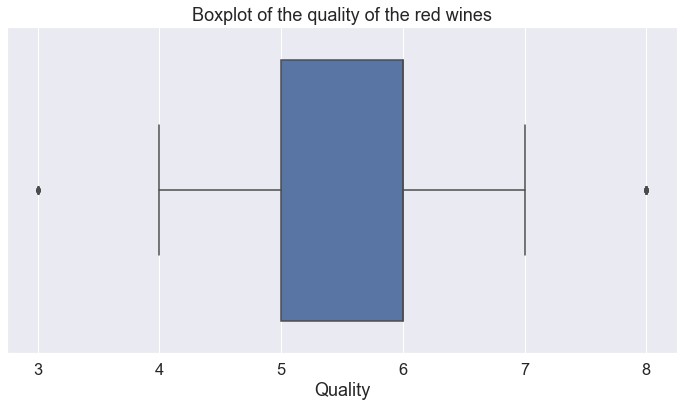

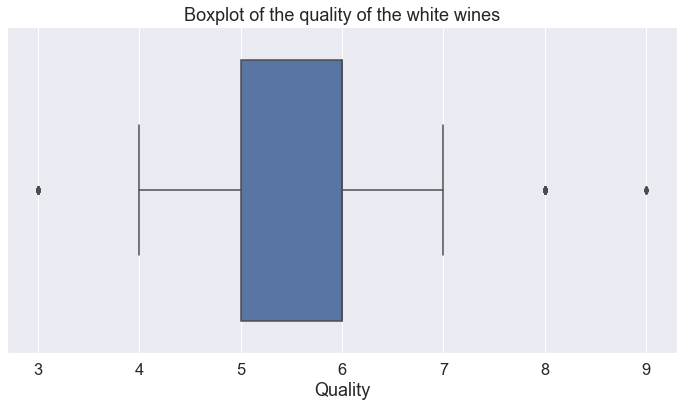

In [7]:
#For the red wines:

plt.figure(figsize=(12, 6))
sns.set(font_scale=1.5)
boxplot = sns.boxplot(x="quality",data=dfred2)
boxplot.axes.set_title("Boxplot of the quality of the red wines")
boxplot.set_xlabel("Quality")
boxplot.set_ylabel("")
plt.show()

#For the white wines:

plt.figure(figsize=(12, 6))
sns.set(font_scale=1.5)
boxplot = sns.boxplot(x="quality",data=dfwhite2)
boxplot.axes.set_title("Boxplot of the quality of the white wines")
boxplot.set_xlabel("Quality")
boxplot.set_ylabel("")
plt.show()

- In both boxplots, there are outliers which are over the upper and lower limits of the plot.
- Let's count these data:

In [8]:
outliersred=0
outlierswhite=0
i="quality"
#For the red wines:
#Lower limit:
q_low = dfred2[i].quantile(0.25)-(1.5*(dfred2[i].quantile(0.75)-dfred2[i].quantile(0.25)))

#Upper limit:
q_hi  = dfred2[i].quantile(0.75)+(1.5*(dfred2[i].quantile(0.75)-dfred2[i].quantile(0.25)))

#Summing the data which are under the lower limit and above the upper limit:
outliersred+=dfred2[dfred2[i]<q_low].shape[0]+dfred2[dfred2[i]>q_hi].shape[0]
#For the white wines:
#Lower limit
q_low = dfwhite2[i].quantile(0.25)-(1.5*(dfwhite2[i].quantile(0.75)-dfwhite2[i].quantile(0.25)))

#Upper Limit
q_hi  = dfwhite2[i].quantile(0.75)+(1.5*(dfwhite2[i].quantile(0.75)-dfwhite2[i].quantile(0.25)))

#Summing the data which are under the lower limit and above the upper limit:
outlierswhite+=dfwhite2[dfwhite2[i]<q_low].shape[0]+dfwhite2[dfwhite2[i]>q_hi].shape[0]

#Printing the results:
print("Outliers in the data of the red wines:",outliersred, "lines, which represent",(outliersred/dfred2.shape[0])*100,"% of the data.")
print("Outliers in the data of the white wines:",outlierswhite,"lines, which represent",(outlierswhite/dfwhite2.shape[0])*100,"% of the data")

Outliers in the data of the red wines: 27 lines, which represent 1.9867549668874174 % of the data.
Outliers in the data of the white wines: 156 lines, which represent 3.938399394092401 % of the data


- I chose to remove these outliers, since they represent a small percentage of the data, by filtering the DataFrame: we'll select only data which are between certain limits:

In [9]:
dfred3=dfred2[(dfred2["quality"]>q_low)&(dfred2["quality"]<q_hi)]
dfwhite3=dfwhite2[(dfwhite2["quality"]>q_low)&(dfwhite2["quality"]<q_hi)]

- We'll use Pearson's correlation (linear correlation) to check the correlations between different variables:

In [10]:
print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\nPearson's correlation for the red wines\n*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")
display(dfred3.corr(method="pearson"))
print("*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*\nPearson's correlation for the white wines\n*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*")
display(dfwhite3.corr(method="pearson"))

*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Pearson's correlation for the red wines
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.254384,0.663438,0.108343,0.085194,-0.140544,-0.101322,0.670446,-0.685602,0.193439,-0.054515,0.130699
volatile acidity,-0.254384,1.000000,-0.548969,-0.006197,0.047723,-0.011022,0.081793,0.025859,0.234576,-0.246979,-0.204297,-0.375562
citric acid,0.663438,-0.548969,1.000000,0.144952,0.217841,-0.046213,0.051770,0.357761,-0.544506,0.324559,0.107435,0.218953
residual sugar,0.108343,-0.006197,0.144952,1.000000,0.029864,0.171445,0.209813,0.323542,-0.085369,-0.010515,0.059854,0.015759
chlorides,0.085194,0.047723,0.217841,0.029864,1.000000,0.001014,0.049530,0.193453,-0.276099,0.407839,-0.218907,-0.111609
free sulfur dioxide,-0.140544,-0.011022,-0.046213,0.171445,0.001014,1.000000,0.666327,-0.011546,0.057721,0.054777,-0.084460,-0.060272
total sulfur dioxide,-0.101322,0.081793,0.051770,0.209813,0.049530,0.666327,1.000000,0.084028,-0.082761,0.035749,-0.223169,-0.199786
density,0.670446,0.025859,0.357761,0.323542,0.193453,-0.011546,0.084028,1.000000,-0.355692,0.156113,-0.497149,-0.161429
pH,-0.685602,0.234576,-0.544506,-0.085369,-0.276099,0.057721,-0.082761,-0.355692,1.000000,-0.214634,0.212390,-0.037646
sulphates,0.193439,-0.246979,0.324559,-0.010515,0.407839,0.054777,0.035749,0.156113,-0.214634,1.000000,0.083242,0.235981


*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*
Pearson's correlation for the white wines
*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*-*


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.022253,0.303222,0.077768,0.015530,-0.057857,0.080511,0.255136,-0.426438,-0.014477,-0.097163,-0.110538
volatile acidity,-0.022253,1.000000,-0.164804,0.101767,0.086506,-0.106980,0.104820,0.070261,-0.046822,-0.016544,0.033039,-0.224555
citric acid,0.303222,-0.164804,1.000000,0.106796,0.135823,0.103914,0.128910,0.162586,-0.188686,0.054305,-0.080330,0.005756
residual sugar,0.077768,0.101767,0.106796,1.000000,0.070443,0.332303,0.416216,0.826449,-0.159145,-0.015767,-0.404181,-0.117752
chlorides,0.015530,0.086506,0.135823,0.070443,1.000000,0.108526,0.184757,0.242655,-0.082872,0.011316,-0.350274,-0.208667
free sulfur dioxide,-0.057857,-0.106980,0.103914,0.332303,0.108526,1.000000,0.616258,0.318636,-0.019008,0.028358,-0.274193,0.030153
total sulfur dioxide,0.080511,0.104820,0.128910,0.416216,0.184757,0.616258,1.000000,0.542638,0.009872,0.137063,-0.454736,-0.167747
density,0.255136,0.070261,0.162586,0.826449,0.242655,0.318636,0.542638,1.000000,-0.052494,0.082303,-0.755131,-0.322424
pH,-0.426438,-0.046822,-0.188686,-0.159145,-0.082872,-0.019008,0.009872,-0.052494,1.000000,0.138416,0.084561,0.117111
sulphates,-0.014477,-0.016544,0.054305,-0.015767,0.011316,0.028358,0.137063,0.082303,0.138416,1.000000,-0.017522,0.066446


- The target variable, "quality", has a very low linear correlation with these variables and the highest correlation, in both databases, is between "quality" and "alcohol". There are variables wit a very low correlation (lower than 5%). Using a function to filter those variables, I tried to remove them and work with the rest of the data but the final scores for this regression model were worse than when I used all the data, so I chose to leave the function here just to show how it can be done and use all the data instead:

In [11]:
def select_features(threshold):
    '''Using this function with a threshold of 0 will select all the DataFrame (and remove no data). 
If you want to use only part of the DataFrame, you can use a threshold which is above the absolute value of
correlation between a given variable and the target variable.'''
    abs_corrs = correlations.abs()
    corr_high = abs_corrs[abs_corrs > threshold].index.values.tolist()
    return corr_high

In [12]:
correlations=dfred3.corr(method="pearson")['quality'].drop('quality')

In [13]:
correlations

fixed acidity           0.130699
volatile acidity       -0.375562
citric acid             0.218953
residual sugar          0.015759
chlorides              -0.111609
free sulfur dioxide    -0.060272
total sulfur dioxide   -0.199786
density                -0.161429
pH                     -0.037646
sulphates               0.235981
alcohol                 0.467345
Name: quality, dtype: float64

In [14]:
corr_red=select_features(0.00)
corr_red #We'll use this variable to filter the DataFrame of the red wines and select only these columns:

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

In [15]:
correlations_white=dfwhite3.corr()['quality'].drop('quality')

In [16]:
correlations_white

fixed acidity          -0.110538
volatile acidity       -0.224555
citric acid             0.005756
residual sugar         -0.117752
chlorides              -0.208667
free sulfur dioxide     0.030153
total sulfur dioxide   -0.167747
density                -0.322424
pH                      0.117111
sulphates               0.066446
alcohol                 0.443713
Name: quality, dtype: float64

In [17]:
corr_white=select_features(0.00)

In [18]:
corr_white #Filter for the DataFrame of the white wines

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol']

# Linear Regression


- I decided to work with the datasets separately and see how the model fits each case.

## Linear Regression for the dataset of the red wines:

- Firstly, we separate the dataset in X and Y in order to separate the target variable from the other variables:

In [19]:
X=dfred3[corr_red]
Y=dfred3["quality"]

- Using the train_test_split function, I separated the database in training data and test data, using the "stratify" parameter to mitigate the unbalance between the values of the target variable. After that, I standardized the data with StandardScaler, passed them to model and defined the prediction for the test database:

In [20]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)
linreg=LinearRegression()
linreg.fit(X_train_std,Y_train)
Y_pred=linreg.predict(X_test_std)

- Let's plot the predicted data and compare them to the real data:

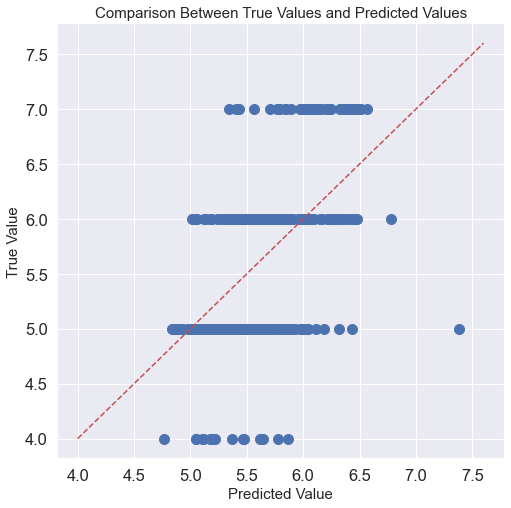

In [21]:
fig = plt.figure(figsize=(8,8))
l = plt.plot(Y_pred, Y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparison Between True Values and Predicted Values', fontsize=15)
plt.ylabel("True Value", fontsize=15)
plt.xlabel("Predicted Value", fontsize=15)

xl = np.arange(min(Y_test), 1.1*max(Y_test), (max(Y_test)-min(Y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show()

- Performance measures for the Linear Regression:

In [22]:
r2=r2_score(Y_test,Y_pred)
MAE=mean_absolute_error(Y_test,Y_pred)
MSE=mean_squared_error(Y_test,Y_pred,squared=True)
RMSE=mean_squared_error(Y_test,Y_pred,squared=False)
print(f"R2: {r2*100:.4f}%")
print(f"Mean Absolute Error: {MAE*100:.4f}%")
print(f"Mean Squared Error: {MSE*100:.4f}%")
print(f"Root Mean Squared Error: {RMSE*100:.4f}%")

R2: 33.3944%
Mean Absolute Error: 49.3154%
Mean Squared Error: 37.7882%
Root Mean Squared Error: 61.4721%


- Let's try the regularization techniques to see if we can improve the results a bit, including the built-in cross-validation in these methods:

### Ridge:

In [23]:
ridge = RidgeCV(cv=10)
ridge.fit(X_train_std, Y_train)
Y_pred_ridge = ridge.predict(X_test_std)
R2_ridge = r2_score(Y_test, Y_pred_ridge)
MAE_ridge=mean_absolute_error(Y_test,Y_pred_ridge)
MSE_ridge=mean_squared_error(Y_test,Y_pred_ridge,squared=True)
RMSE_ridge=mean_squared_error(Y_test,Y_pred_ridge,squared=False)
print(f"R2: {R2_ridge*100:.4f}%")
print(f"Mean Absolute Error: {MAE_ridge*100:.4f}%")
print(f"Mean Squared Error: {MSE_ridge*100:.4f}%")
print(f"Root Mean Squared Error: {RMSE_ridge*100:.4f}%")

R2: 33.3463%
Mean Absolute Error: 49.3937%
Mean Squared Error: 37.8155%
Root Mean Squared Error: 61.4943%


### Lasso:

In [24]:
lasso = LassoCV(cv=10)
lasso.fit(X_train_std, Y_train)
Y_pred_lasso = lasso.predict(X_test_std)
R2_lasso = r2_score(Y_test, Y_pred_lasso)
MAE_lasso=mean_absolute_error(Y_test,Y_pred_lasso)
MSE_lasso=mean_squared_error(Y_test,Y_pred_lasso,squared=True)
RMSE_lasso=mean_squared_error(Y_test,Y_pred_lasso,squared=False)
print(f"R2: {R2_lasso*100:.4f}%")
print(f"Mean Absolute Error: {MAE_lasso*100:.4f}%")
print(f"Mean Squared Error: {MSE_lasso*100:.4f}%")
print(f"Root Mean Squared Error: {RMSE_lasso*100:.4f}%")

R2: 33.2755%
Mean Absolute Error: 49.6692%
Mean Squared Error: 37.8557%
Root Mean Squared Error: 61.5270%


### Elastic-Net:

In [25]:
EN = ElasticNetCV(cv=10)
EN.fit(X_train_std, Y_train)
Y_pred_EN = EN.predict(X_test_std)
R2_EN = r2_score(Y_test, Y_pred_EN)
MAE_EN=mean_absolute_error(Y_test,Y_pred_EN)
MSE_EN=mean_squared_error(Y_test,Y_pred_EN,squared=True)
RMSE_EN=mean_squared_error(Y_test,Y_pred_EN,squared=False)
print(f"R2: {R2_EN*100:.4f}%")
print(f"Mean Absolute Error: {MAE_EN*100:.4f}%")
print(f"Mean Squared Error: {MSE_EN*100:.4f}%")
print(f"Root Mean Squared Error: {RMSE_EN*100:.4f}%")

R2: 33.2989%
Mean Absolute Error: 49.5858%
Mean Squared Error: 37.8424%
Root Mean Squared Error: 61.5162%


- The techniques did not improve the model's performance. Let's check the residues and the coefficients of the regression.

### Residues:

- For the residues, we calculate the difference between the true values and the predicted values:

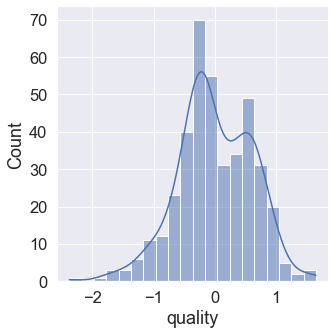

In [26]:
res=Y_test-Y_pred
sns.displot(res,kde=True,bins=20);

<AxesSubplot:xlabel='quality'>

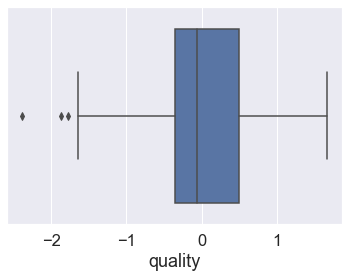

In [27]:
sns.boxplot(x=res)

- The residual values don't follow a normal distribution, but there are few outliers and the median is close to zero, which is the expected behavior for these values.

### Coefficients for the Linear Regression:

In [28]:
#Method which returns the coefficients
coefs = linreg.coef_

#Method which returns the names of the columns of the database
list_columns = X_train.columns
list_feature = []
list_score = []
#Creating two lists: one with the names of the features and one with the scores
for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary = {'Features': list_feature,
              'Scores': list_score}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)
df_features

,Features,Scores
0,alcohol,0.263613
1,sulphates,0.127831
2,fixed acidity,0.100616
3,free sulfur dioxide,0.053575
4,residual sugar,0.001484
5,citric acid,-0.006488
6,pH,-0.008453
7,density,-0.043292
8,chlorides,-0.045001
9,total sulfur dioxide,-0.089067


## Linear Regression for the white wines, following the same proccess:

- First, we separate the database:

In [29]:
X=dfwhite3[corr_white]
Y=dfwhite3["quality"]

- Then, we train the model and make the prediction:

In [30]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=42,stratify=Y)
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)
linreg=LinearRegression()
linreg.fit(X_train_std,Y_train)
Y_pred=linreg.predict(X_test_std)

- Let's compare the true and the predicted values:

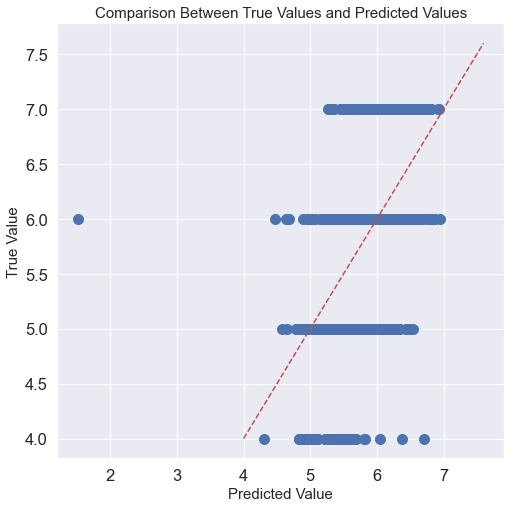

In [31]:
fig = plt.figure(figsize=(8,8))

l = plt.plot(Y_pred, Y_test, 'bo')
plt.setp(l, markersize=10)
plt.setp(l, markerfacecolor='C0')
plt.title('Comparison Between True Values and Predicted Values', fontsize=15)
plt.ylabel("True Value", fontsize=15)
plt.xlabel("Predicted Value", fontsize=15)


xl = np.arange(min(Y_test), 1.1*max(Y_test), (max(Y_test)-min(Y_test))/10)
yl = xl
plt.plot(xl, yl, 'r--')

plt.show()

- Let's calculate the scores for this regression:

In [32]:
r2=r2_score(Y_test,Y_pred)
MAE=mean_absolute_error(Y_test,Y_pred)
MSE=mean_squared_error(Y_test,Y_pred,squared=True)
RMSE=mean_squared_error(Y_test,Y_pred,squared=False)
print(f"R2: {r2*100:.4f}%")
print(f"Mean Absolute Error: {MAE*100:.4f}%")
print(f"Mean Squared Error: {MSE*100:.4f}%")
print(f"Root Mean Squared Error: {RMSE*100:.4f}%")

R2: 27.0785%
Mean Absolute Error: 53.2353%
Mean Squared Error: 44.3403%
Root Mean Squared Error: 66.5885%


- Regularization methods with Cross Validation:

### Ridge:

In [33]:
ridge = RidgeCV(cv=10)
ridge.fit(X_train_std, Y_train)
Y_pred_ridge = ridge.predict(X_test_std)
R2_ridge = r2_score(Y_test, Y_pred_ridge)
MAE_ridge=mean_absolute_error(Y_test,Y_pred_ridge)
MSE_ridge=mean_squared_error(Y_test,Y_pred_ridge,squared=True)
RMSE_ridge=mean_squared_error(Y_test,Y_pred_ridge,squared=False)
print(f"R2: {R2_ridge*100:.4f}%")
print(f"Mean Absolute Error: {MAE_ridge*100:.4f}%")
print(f"Mean Squared Error: {MSE_ridge*100:.4f}%")
print(f"Root Mean Squared Error: {RMSE_ridge*100:.4f}%")

R2: 27.1771%
Mean Absolute Error: 53.2318%
Mean Squared Error: 44.2803%
Root Mean Squared Error: 66.5435%


### Lasso:

In [34]:
lasso = LassoCV(cv=10)
lasso.fit(X_train_std, Y_train)
Y_pred_lasso = lasso.predict(X_test_std)
R2_lasso = r2_score(Y_test, Y_pred_lasso)
MAE_lasso=mean_absolute_error(Y_test,Y_pred_lasso)
MSE_lasso=mean_squared_error(Y_test,Y_pred_lasso,squared=True)
RMSE_lasso=mean_squared_error(Y_test,Y_pred_lasso,squared=False)
print(f"R2: {R2_lasso*100:.4f}%")
print(f"Mean Absolute Error: {MAE_lasso*100:.4f}%")
print(f"Mean Squared Error: {MSE_lasso*100:.4f}%")
print(f"Root Mean Squared Error: {RMSE_lasso*100:.4f}%")

R2: 27.5252%
Mean Absolute Error: 53.2204%
Mean Squared Error: 44.0687%
Root Mean Squared Error: 66.3843%


### Elastic-Net:

In [35]:
EN = ElasticNetCV(cv=10)
EN.fit(X_train_std, Y_train)
Y_pred_EN = EN.predict(X_test_std)
R2_EN = r2_score(Y_test, Y_pred_EN)
MAE_EN=mean_absolute_error(Y_test,Y_pred_EN)
MSE_EN=mean_squared_error(Y_test,Y_pred_EN,squared=True)
RMSE_EN=mean_squared_error(Y_test,Y_pred_EN,squared=False)
print(f"R2: {R2_EN*100:.4f}%")
print(f"Mean Absolute Error: {MAE_EN*100:.4f}%")
print(f"Mean Squared Error: {MSE_EN*100:.4f}%")
print(f"Root Mean Squared Error: {RMSE_EN*100:.4f}%")

R2: 27.4460%
Mean Absolute Error: 53.2230%
Mean Squared Error: 44.1169%
Root Mean Squared Error: 66.4205%


- The Lasso method produced slightly better measures, but still they're very far from ideal numbers. 

### Residues:

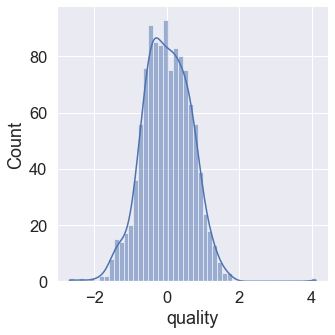

In [36]:
res=Y_test-Y_pred_lasso
sns.displot(res,kde=True, bins=50);

<AxesSubplot:xlabel='quality'>

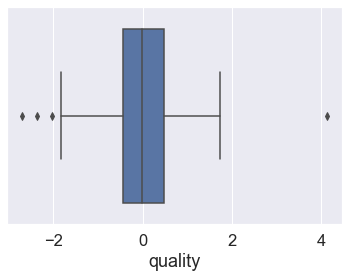

In [37]:
sns.boxplot(x=res)

- The distribution is has its median close to zero, it's "close" to a normal distribution, and it has few outliers.

### Coefficients for the Linear Regression:

In [38]:
coefs = lasso.coef_

list_columns = X_train.columns
list_feature = []
list_score = []

for i, v in enumerate(coefs):
    list_feature.append(list_columns[i])
    list_score.append(v)

dictionary = {'Features': list_feature,
              'Scores': list_score}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)
df_features

,Features,Scores
0,residual sugar,0.355765
1,alcohol,0.146252
2,pH,0.134474
3,free sulfur dioxide,0.090756
4,sulphates,0.073881
5,fixed acidity,0.073486
6,citric acid,0.026558
7,total sulfur dioxide,0.002235
8,chlorides,-0.002321
9,volatile acidity,-0.156797


## Conclusions:

- From the results obtained, it's observed that this is not the most adequate model to work with this sort of problem or, at least, all the techniques used did not produce adequate results. Even when using only features which had a minimum of correlation with the target feature or when using regularization methods with cross validation, the measures of the regression model are still far from ideal, which means the model is unable to predict the results accurately. A few observations:


- 1) A high Pearson's correlation score between features does not necessarily mean a relationship of causality. Note that the model used, for the white wines, a higher coefficient for "residual sugar" than the one it used for "alcohol", which was the feature with the highest absolute Pearson's correlation score.


- 2) The database is unbalanced: we have too many wines with quality scores of 5 or 6 and too few wines with other scores, which makes it difficult for the model to "learn" how to predict every case. The most appropriate course of action, regarding this, would be to gather more data and make a more balanced batabase. However, this alone would not allow us to make an efficient linear regression model because of the other problems with the data.


- 3) The target variable, "quality", is a qualitative variable and not exactly a quantitative one. Despite the fact that we represent it through numbers, there is a degree of subjectivity associated with this variable, which makes it hard for the model to find an adequate relationship between the variables.


- 4) Finally, the target variable is also a discrete variable while the rest of the date are continuous variables and this also creates problems for the model, as it is rounding the results.

# Logistic Regression



- Firstly, let's change the values in the "quality" column to 1 (for "good") or 0 (for "bad") in both databases:

In [39]:
#Counting the number of each different score in the database of the red wines:
dfred3["quality"].value_counts()

5    577
6    535
7    167
4     53
Name: quality, dtype: int64

In [40]:
#Changing the values to 1, when equal to or higher than 6, or to 0, when lower than 6:
bins = [0,5.5,11]
labels= [0,1]
dfred3['quality_boolean']=pd.cut(dfred3['quality'],bins=bins, labels=labels)
dfred3=dfred3.drop("quality",axis=1)
dfred3['quality_boolean'].value_counts()

<ipython-input-40-26aa77e7297b>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfred3['quality_boolean']=pd.cut(dfred3['quality'],bins=bins, labels=labels)


1    702
0    630
Name: quality_boolean, dtype: int64

<AxesSubplot:xlabel='quality_boolean', ylabel='count'>

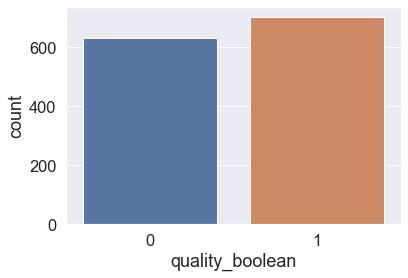

In [41]:
#Plotting the result:
sns.countplot(x=dfred3["quality_boolean"])

In [42]:
#Counting the values in the column "quality" for the white wines:
dfwhite3["quality"].value_counts()

6    1788
5    1175
7     689
4     153
Name: quality, dtype: int64

In [43]:
#Changing the values to 1 or 0 like we did for the red wines:
bins = [0,5.5,11]
labels= [0,1]
dfwhite3['quality_boolean']=pd.cut(dfwhite3['quality'],bins=bins, labels=labels)
dfwhite3=dfwhite3.drop("quality",axis=1)
dfwhite3['quality_boolean'].value_counts()

<ipython-input-43-01dd61c47456>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfwhite3['quality_boolean']=pd.cut(dfwhite3['quality'],bins=bins, labels=labels)


1    2477
0    1328
Name: quality_boolean, dtype: int64

<AxesSubplot:xlabel='quality_boolean', ylabel='count'>

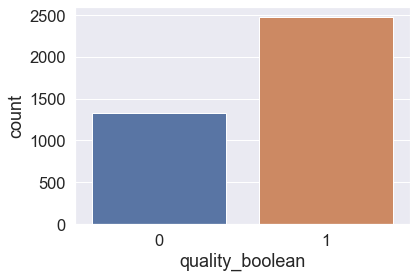

In [44]:
#Plotting the result:
sns.countplot(x=dfwhite3["quality_boolean"])

## Logistic Regression for the red wines:

- Firstly, we separate the database in X and Y, leaving only the target feature in Y:

In [45]:
X=dfred3[corr_red]
Y=dfred3["quality_boolean"]

- We separate the batabase between training data and test data:

In [46]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42,stratify=Y)

- We standardize the data before applying the model:

In [47]:
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

- Passing the data to the model:

In [48]:
logregred=LogisticRegression(max_iter=1000)
logregred.fit(X_train_std,Y_train)

LogisticRegression(max_iter=1000)

- Predicting with the test data:

In [49]:
Y_pred=logregred.predict(X_test_std)

### Confusion matrix for the red wines 
- This will allow us to see the True Positive and False Positive values

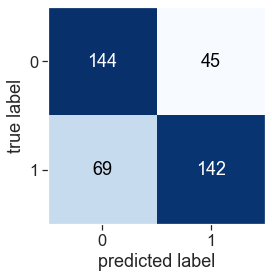

In [50]:
cm=confusion_matrix(Y_test,Y_pred)
plot_confusion_matrix(conf_mat=cm)
plt.show()

- The model predicted more false negatives than false positives (it predicted more "bad" labels for good wines than "good" labels for bad wines. Therefore, the model's precision is higher than its recall.
### The measure scores for the regression are:

In [51]:
print('Accuracy: ', accuracy_score(Y_test, Y_pred))
print('Precision: ', precision_score(Y_test, Y_pred))
print('Recall: ', recall_score(Y_test, Y_pred))
print('F1-Score: ', f1_score(Y_test, Y_pred))

Accuracy:  0.715
Precision:  0.7593582887700535
Recall:  0.6729857819905213
F1-Score:  0.7135678391959799


### Let's see how the model behaves with different thresholds other than the standard of 0.5 before we pick the best one:

In [52]:
Y_proba_test = logregred.predict_proba(X_test_std)

In [53]:
results_test = pd.DataFrame(Y_test)
results_test['proba'] = np.round(Y_proba_test[:,1], 3)
results_test

,quality_boolean,proba
604,1,0.175
641,0,0.263
1215,1,0.842
98,0,0.224
303,0,0.147
...,...,...
1313,1,0.433
1414,0,0.628
509,1,0.911
243,1,0.831


In [54]:
#Defining the parameters for the loop
threshold_increment  = 0.01
threshold_begin = threshold_increment
threshold_end    = 1.0

# For each threshold, the loop will calculate TN, FN, FP, TP and other scores

list_threshold  = []
list_TN         = []
list_FN         = []
list_FP         = []
list_TP         = []
list_precision  = []
list_recall     = []
list_accuracy   = []
list_f1_score   = []

for i in np.arange(threshold_begin, threshold_end + threshold_increment, threshold_increment):
    i_threshold = np.round(i, 2)
    print(str(i_threshold) + ' ', end = '')
    
    results_test['y_pred'] = results_test['proba'].apply(lambda x: 1 if x >= i_threshold else 0)
    results_test['flag_TN'] = np.where((results_test['y_pred'] == 0) & (results_test['quality_boolean'] == 0), 1, 0)
    results_test['flag_FN'] = np.where((results_test['y_pred'] == 0) & (results_test['quality_boolean'] == 1), 1, 0)
    results_test['flag_TP'] = np.where((results_test['y_pred'] == 1) & (results_test['quality_boolean'] == 1), 1, 0)
    results_test['flag_FP'] = np.where((results_test['y_pred'] == 1) & (results_test['quality_boolean'] == 0), 1, 0)
  
    TN = results_test['flag_TN'].sum()
    FN = results_test['flag_FN'].sum()
    TP = results_test['flag_TP'].sum()
    FP = results_test['flag_FP'].sum()
    
    precisiondf = np.where((TP + FP) > 0, TP / (TP + FP), 0)
    recalldf = np.where((TP + FN) > 0, TP / (TP + FN), 0)
    accuracydf = np.where((TN + FN + TP + FP) > 0, 
                         (TP + TN)/(TN + FN + TP + FP), 0)
    f1_scoredf = np.where((precisiondf + recalldf) > 0, (2 * precisiondf * recalldf)/(precisiondf + recalldf), 0)
    
    list_threshold.append(i_threshold)
    list_TN.append(TN)
    list_FN.append(FN)
    list_FP.append(FP)
    list_TP.append(TP)
    list_precision.append(np.round(precisiondf, 6))
    list_recall.append(np.round(recalldf, 6))
    list_accuracy.append(np.round(accuracydf, 6))
    list_f1_score.append(np.round(f1_scoredf, 6))

#---------------------
dict_output = {
  "threshold" : list_threshold, 
  "TN" : list_TN,
  "FN" : list_FN,
  "FP" : list_FP,
  "TP" : list_TP,
  "precision" : list_precision,
  "recall" : list_recall,
  "accuracy" : list_accuracy,
  "f1_score" : list_f1_score
}

df_results = pd.DataFrame(dict_output)

0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4 0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.0 

<ipython-input-54-b38f0d0cb034>:37: RuntimeWarning: invalid value encountered in double_scalars
  f1_scoredf = np.where((precisiondf + recalldf) > 0, (2 * precisiondf * recalldf)/(precisiondf + recalldf), 0)
<ipython-input-54-b38f0d0cb034>:33: RuntimeWarning: invalid value encountered in longlong_scalars
  precisiondf = np.where((TP + FP) > 0, TP / (TP + FP), 0)


In [55]:
df_results.head(50)

,threshold,TN,FN,FP,TP,precision,recall,accuracy,f1_score
0,0.01,0,0,189,211,0.527500,1.000000,0.5275,0.690671
1,0.02,0,0,189,211,0.527500,1.000000,0.5275,0.690671
2,0.03,0,0,189,211,0.527500,1.000000,0.5275,0.690671
3,0.04,1,0,188,211,0.528822,1.000000,0.5300,0.691803
4,0.05,2,0,187,211,0.530151,1.000000,0.5325,0.692939
5,0.06,2,0,187,211,0.530151,1.000000,0.5325,0.692939
6,0.07,3,0,186,211,0.531486,1.000000,0.5350,0.694079
7,0.08,6,0,183,211,0.535533,1.000000,0.5425,0.697521
8,0.09,8,1,181,210,0.537084,0.995261,0.5450,0.697674
9,0.10,13,2,176,209,0.542857,0.990521,0.5550,0.701342


- Plotting the F1-score matching each value of threshold:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


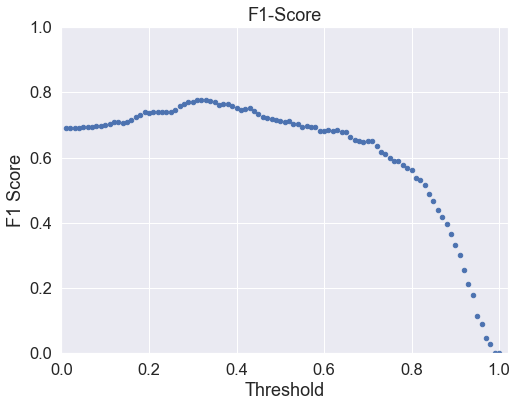

In [56]:
grap = df_results[df_results["threshold"] > 0.0].plot(kind="scatter", 
                                                         x="threshold", 
                                                         y="f1_score", 
                                                         grid=True, 
                                                         legend=True, 
                                                         title="F1-Score",
                                                         figsize=[8,6])
grap.set(xlabel="Threshold", 
            ylabel="F1 Score", 
            xlim=(0.0,1.02), 
            ylim=(0.0,1.0));


- Plotting the Precision-Recall curve:

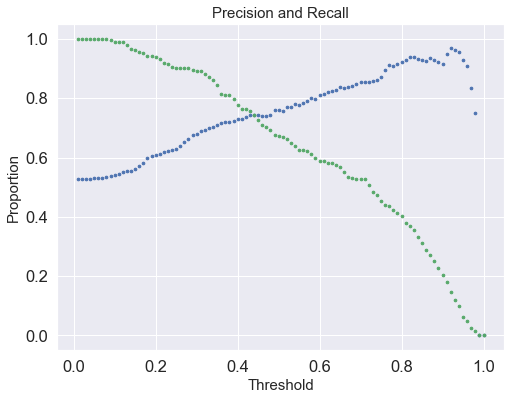

In [57]:
k = 2
fig = plt.figure(figsize = (k*4,k*3))
ax1 = fig.add_subplot(111)
ax1.scatter(df_results['threshold'], df_results['precision'], color = 'b', s = 7)
ax1.scatter(df_results['threshold'], df_results['recall']   , color = 'g', s = 7)
ax1.set_xlabel('Threshold', fontsize = 15)
ax1.set_ylabel('Proportion', fontsize = 15)
plt.title("Precision and Recall", fontsize = 15);

- Plotting the ROC (receiver operating characteristic) curve. The ROC curve is produced calculating and plotting the rate of True Positives against the rate of False Positives for a single classifier in a variety of thresholds. The area under this curve (calculated using an integer), is called the AUC (Area Under Curve), which gives us a performance measure for the classifier for the problem we're trying to solve with it.

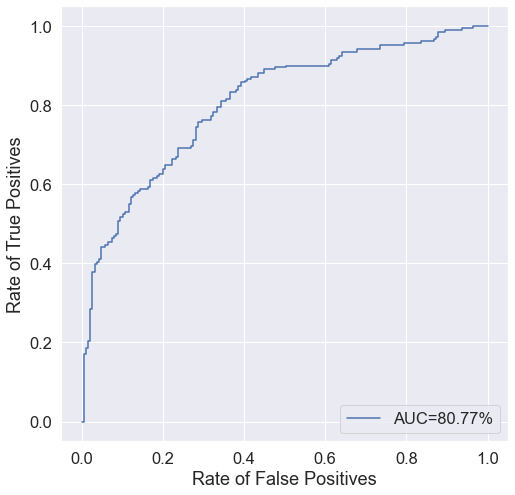

In [58]:
Y_proba_test = logregred.predict_proba(X_test_std)[::,1]
fpr, tpr, _ = roc_curve(Y_test, Y_proba_test)
auc = roc_auc_score(Y_test, Y_proba_test)
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,label="AUC="+str(np.round(auc,4)*100)+"%")
plt.xlabel("Rate of False Positives")
plt.ylabel("Rate of True Positives")
plt.legend(loc=4)
plt.show()

### Choosing the threshold for the regression model:
- False Positives are bad wines which the model labeled as good while False Negatives are good wines which the model labeled as bad.


- Depending on the business model a wine producer wishes to employ, they may wish to obtain more False Positives than False Negatives or vice-versa. A third option is a model in which these rates are balanced and we minimize both False Positives and False Negatives, as much as possible as it is possible to minimize them without damaging the other measures.


- I chose to use a threshold which minimizes both False Negatives and False Positives (a threshold with the smallest sum of both in which they are not very unbalanced) because, in this particular problem, I interpret that both the rate of False Positives and the rate of False Negatives, when high, would bring high losses/disadvantages to the business. On one side, we would be selling good wines for the price of bad wines, which is simply a loss of money; on the other side, we would be selling bad wines for the price of good wines, which would make us lose consumers.

### Parameters of the chosen threshold:

In [59]:
df_results.loc[42]

threshold      0.430000
TN           134.000000
FN            51.000000
FP            55.000000
TP           160.000000
precision      0.744186
recall         0.758294
accuracy       0.735000
f1_score       0.751174
Name: 42, dtype: float64

- Let's create a new y_pred with the chosen threshold and see how the model behaves with it:

In [60]:
Y_proba_test = logregred.predict_proba(X_test_std)
y_pred2 = np.where(Y_proba_test[:,1] >= 0.43, 1, 0)

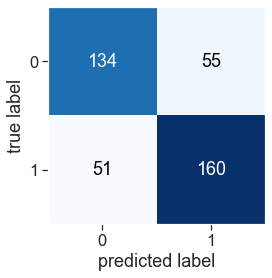

In [61]:
cm = confusion_matrix(Y_test, y_pred2)

plot_confusion_matrix(conf_mat=cm)
plt.show()

### Scores of the Logistic Regression of the red wines with the new threshold:

In [62]:
print('Accuracy: ', accuracy_score(Y_test, y_pred2))
print('Precision: ', precision_score(Y_test, y_pred2))
print('Recall: ', recall_score(Y_test, y_pred2))
print('F1-Score: ', f1_score(Y_test, y_pred2))

Accuracy:  0.735
Precision:  0.7441860465116279
Recall:  0.7582938388625592
F1-Score:  0.7511737089201879


### Coefficients for the Logistic Regression of the Red Wines:

In [63]:
coefs=[]
for x in np.nditer(logregred.coef_):
    coefs.append(np.round(x,4))

list_columns = list(X_train.columns)

dictionary = {'Features': list_columns,
              'Scores': coefs}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)
df_features

,Features,Scores
0,alcohol,0.9259
1,sulphates,0.5091
2,fixed acidity,0.3055
3,free sulfur dioxide,0.1830
4,residual sugar,0.0590
5,pH,0.0361
6,density,-0.1104
7,citric acid,-0.1475
8,chlorides,-0.2834
9,total sulfur dioxide,-0.4655


- According to these parameters, a wine producer who would like to produce a better wine should focus on making the wine have a lower quantity of the negative parameters and a higher quantity of the positive ones.

## Logistic Regression for the white wines:

- Separating the database in X and Y:

In [64]:
X=dfwhite3[corr_white]
Y=dfwhite3["quality_boolean"]

- Separating the database in training data and test data:

In [65]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.30,random_state=42,stratify=Y)

- Standardizing the training data before applying the model:

In [66]:
std=StandardScaler()
X_train_std=std.fit_transform(X_train)
X_test_std=std.transform(X_test)

- Passing the data to the model:

In [67]:
logregwhite=LogisticRegression(max_iter=1000)
logregwhite.fit(X_train_std,Y_train)

LogisticRegression(max_iter=1000)

- Defining the prediction for the test data:

In [68]:
Y_pred=logregwhite.predict(X_test_std)

### Confusion matrix for the white wines:

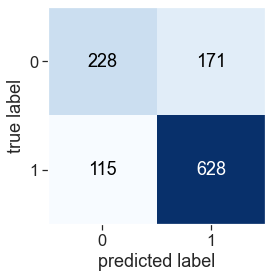

In [69]:
cm=confusion_matrix(Y_test,Y_pred)
plot_confusion_matrix(conf_mat=cm)
plt.show()

- There is a high rate of True Positives relative to True Negatives. There are also more False Positives than False Negatives. Therefore, recall is higher than precision.

In [70]:
print('Accuracy: ', accuracy_score(Y_test, Y_pred))
print('Precision: ', precision_score(Y_test, Y_pred))
print('Recall: ', recall_score(Y_test, Y_pred))
print('F1-Score: ', f1_score(Y_test, Y_pred))

Accuracy:  0.7495621716287215
Precision:  0.785982478097622
Recall:  0.845222072678331
F1-Score:  0.814526588845655


### Let's observe how different thresholds change the behavior of the model:

In [71]:
Y_proba_test = logregwhite.predict_proba(X_test_std)

In [72]:
results_test = pd.DataFrame(Y_test)
results_test['proba'] = np.round(Y_proba_test[:,1], 3)
results_test

,quality_boolean,proba
1199,1,0.655
4135,0,0.913
3883,1,0.884
923,1,0.713
4651,1,0.963
...,...,...
4509,0,0.472
1675,0,0.444
2746,1,0.615
3052,1,0.827


In [73]:
#Parameters of the loop
threshold_increment  = 0.01
threshold_begin = threshold_increment
threshold_end    = 1.0

# For each threshold, calculate TN, FN, FP, TP and other measures

list_threshold  = []
list_TN         = []
list_FN         = []
list_FP         = []
list_TP         = []
list_precision  = []
list_recall     = []
list_accuracy   = []
list_f1_score   = []

for i in np.arange(threshold_begin, threshold_end + threshold_increment, threshold_increment):
    i_threshold = np.round(i, 2)
    print(str(i_threshold) + ' ', end = '')
    
    results_test['y_pred'] = results_test['proba'].apply(lambda x: 1 if x >= i_threshold else 0)
    results_test['flag_TN'] = np.where((results_test['y_pred'] == 0) & (results_test['quality_boolean'] == 0), 1, 0)
    results_test['flag_FN'] = np.where((results_test['y_pred'] == 0) & (results_test['quality_boolean'] == 1), 1, 0)
    results_test['flag_TP'] = np.where((results_test['y_pred'] == 1) & (results_test['quality_boolean'] == 1), 1, 0)
    results_test['flag_FP'] = np.where((results_test['y_pred'] == 1) & (results_test['quality_boolean'] == 0), 1, 0)
  
    TN = results_test['flag_TN'].sum()
    FN = results_test['flag_FN'].sum()
    TP = results_test['flag_TP'].sum()
    FP = results_test['flag_FP'].sum()
    
    precisiondf = np.where((TP + FP) > 0, TP / (TP + FP), 0)
    recalldf = np.where((TP + FN) > 0, TP / (TP + FN), 0)
    accuracydf = np.where((TN + FN + TP + FP) > 0, 
                         (TP + TN)/(TN + FN + TP + FP), 0)
    f1_scoredf = np.where((precisiondf + recalldf) > 0, (2 * precisiondf * recalldf)/(precisiondf + recalldf), 0)
    
    list_threshold.append(i_threshold)
    list_TN.append(TN)
    list_FN.append(FN)
    list_FP.append(FP)
    list_TP.append(TP)
    list_precision.append(np.round(precisiondf, 6))
    list_recall.append(np.round(recalldf, 6))
    list_accuracy.append(np.round(accuracydf, 6))
    list_f1_score.append(np.round(f1_scoredf, 6))

#---------------------
dict_output = {
  "threshold" : list_threshold, 
  "TN" : list_TN,
  "FN" : list_FN,
  "FP" : list_FP,
  "TP" : list_TP,
  "precision" : list_precision,
  "recall" : list_recall,
  "accuracy" : list_accuracy,
  "f1_score" : list_f1_score
}

df_results = pd.DataFrame(dict_output)

0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09 0.1 0.11 0.12 0.13 0.14 0.15 0.16 0.17 0.18 0.19 0.2 0.21 0.22 0.23 0.24 0.25 0.26 0.27 0.28 0.29 0.3 0.31 0.32 0.33 0.34 0.35 0.36 0.37 0.38 0.39 0.4 0.41 0.42 0.43 0.44 0.45 0.46 0.47 0.48 0.49 0.5 0.51 0.52 0.53 0.54 0.55 0.56 0.57 0.58 0.59 0.6 0.61 0.62 0.63 0.64 0.65 0.66 0.67 0.68 0.69 0.7 0.71 0.72 0.73 0.74 0.75 0.76 0.77 0.78 0.79 0.8 0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9 0.91 0.92 0.93 0.94 0.95 0.96 0.97 0.98 0.99 1.0 

<ipython-input-73-b68959bcece3>:33: RuntimeWarning: invalid value encountered in longlong_scalars
  precisiondf = np.where((TP + FP) > 0, TP / (TP + FP), 0)
<ipython-input-73-b68959bcece3>:37: RuntimeWarning: invalid value encountered in double_scalars
  f1_scoredf = np.where((precisiondf + recalldf) > 0, (2 * precisiondf * recalldf)/(precisiondf + recalldf), 0)


In [74]:
df_results.head(50)

,threshold,TN,FN,FP,TP,precision,recall,accuracy,f1_score
0,0.01,1,1,398,742,0.650877,0.998654,0.650613,0.788104
1,0.02,2,1,397,742,0.651449,0.998654,0.651489,0.788523
2,0.03,3,1,396,742,0.652021,0.998654,0.652364,0.788942
3,0.04,5,2,394,741,0.652863,0.997308,0.653240,0.789137
4,0.05,5,3,394,740,0.652557,0.995962,0.652364,0.788492
5,0.06,5,3,394,740,0.652557,0.995962,0.652364,0.788492
6,0.07,6,3,393,740,0.653133,0.995962,0.653240,0.788913
7,0.08,8,4,391,739,0.653982,0.994616,0.654116,0.789108
8,0.09,9,4,390,739,0.654562,0.994616,0.654991,0.789530
9,0.10,16,4,383,739,0.658645,0.994616,0.661121,0.792493


- Plotting the curve which relates F1-score and the different thresholds:

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


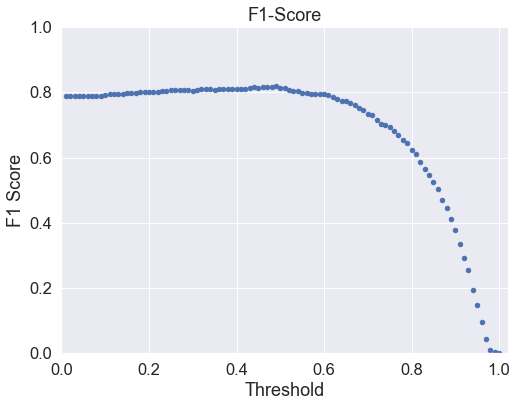

In [75]:
grap = df_results[df_results["threshold"] > 0.0].plot(kind="scatter", 
                                                         x="threshold", 
                                                         y="f1_score", 
                                                         grid=True, 
                                                         legend=True, 
                                                         title="F1-Score",
                                                         figsize=[8,6])
grap.set(xlabel="Threshold", 
            ylabel="F1 Score", 
            xlim=(0.0,1.02), 
            ylim=(0.0,1.0));


- Plotting the Precision-Recall curve:

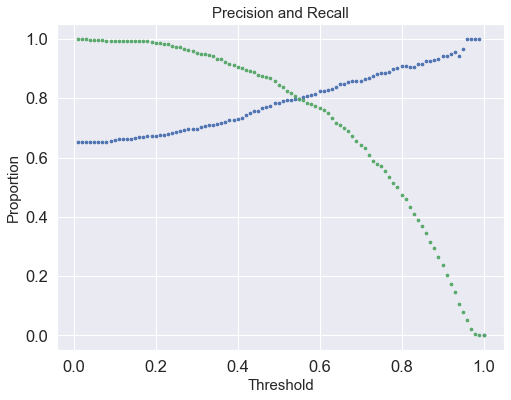

In [76]:
k = 2
fig = plt.figure(figsize = (k*4,k*3))
ax1 = fig.add_subplot(111)
ax1.scatter(df_results['threshold'], df_results['precision'], color = 'b', s = 7)
ax1.scatter(df_results['threshold'], df_results['recall']   , color = 'g', s = 7)
ax1.set_xlabel('Threshold', fontsize = 15)
ax1.set_ylabel('Proportion', fontsize = 15)
plt.title("Precision and Recall", fontsize = 15);

- Plotting the ROC curve and calculating AUC:

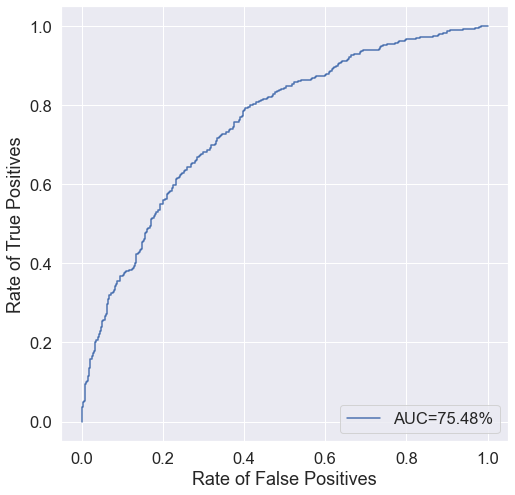

In [77]:
Y_proba_test = logregred.predict_proba(X_test_std)[::,1]
fpr, tpr, _ = roc_curve(Y_test, Y_proba_test)
auc = roc_auc_score(Y_test, Y_proba_test)
plt.figure(figsize=(8,8))
plt.plot(fpr,tpr,label="AUC="+str(np.round(auc,4)*100)+"%")
plt.xlabel("Rate of False Positives")
plt.ylabel("Rate of True Positives")
plt.legend(loc=4)
plt.show()

### Choosing the threshold for the regression:

- Again, I chose to work with the threshold which produces the lowest number of false labels

In [78]:
#Finding the threshold with the lowest sum of FN and FP:
menor=[800,0]
for i in range(len(df_results["FN"])):
    abc=df_results["FN"][i]+df_results["FP"][i]
    if abc<menor[0]:
        menor[0]=abc
        menor[1]=i
print(menor)

[283, 48]


### Parameters of the new threshold:

In [79]:
df_results.loc[48]

threshold      0.490000
TN           222.000000
FN           106.000000
FP           177.000000
TP           637.000000
precision      0.782555
recall         0.857335
accuracy       0.752189
f1_score       0.818240
Name: 48, dtype: float64

In [80]:
Y_proba_test = logregwhite.predict_proba(X_test_std)
y_pred2 = np.where(Y_proba_test[:,1] >= 0.49, 1, 0)

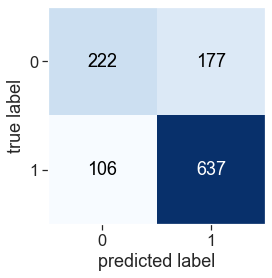

In [81]:
cm = confusion_matrix(Y_test, y_pred2)

plot_confusion_matrix(conf_mat=cm)
plt.show()

### Scores for the Logistic Regression of the white wines with the new threshold:

In [82]:
print('Accuracy: ', accuracy_score(Y_test, y_pred2))
print('Precision: ', precision_score(Y_test, y_pred2))
print('Recall: ', recall_score(Y_test, y_pred2))
print('F1-Score: ', f1_score(Y_test, y_pred2))

Accuracy:  0.7521891418563923
Precision:  0.7825552825552825
Recall:  0.857335127860027
F1-Score:  0.8182402055234425


In [83]:
coefs=[]
for x in np.nditer(logregwhite.coef_):
    coefs.append(np.round(x,4))

list_columns = list(X_train.columns)

dictionary = {'Features': list_columns,
              'Scores': coefs}

df_features = pd.DataFrame(dictionary)
df_features = df_features.sort_values(by=['Scores'], ascending=False)
df_features.reset_index(inplace=True, drop=True)
df_features

,Features,Scores
0,residual sugar,1.0400
1,alcohol,0.4700
2,pH,0.3648
3,free sulfur dioxide,0.2260
4,fixed acidity,0.2064
5,sulphates,0.2005
6,citric acid,0.0339
7,chlorides,0.0277
8,total sulfur dioxide,-0.0533
9,volatile acidity,-0.6186


- According to these parameters, a wine producer who would like to produce a better wine should focus on making the wine have a lower quantity of the negative parameters and a higher quantity of the positive ones.

## Conclusions about the Logistic Regression:

- The model apparently manages to work better with the data than the linear regression and produced measures which are way better, both for the red wines and the white wines.

- The white wines, in the Logistic Regression, produced, again, coefficients which are very different than those of the red wines. The databases are very different, of course, but what I mean is, for example: for the red wines, the feature "alcohol" has the highest absolute value while, for the white wines, the feature which the model sets the highest absolute coefficient to is "residual sugar"). It's probably a better choice to work with these data bases separately to obtain better predictions and avoid causing a bias in the model.